In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# **Leer txt en csv para y revisar que información contiene**

In [2]:
archivo_txt = pd.read_csv("./data_txt_clean.txt", sep= ";")
archivo_txt.head(2)

,index,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,...,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
0,0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,...,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,...,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,NaN


# **Leer csv para revisar su contenido**

In [3]:
archivo_csv = pd.read_csv("./exported_db_data.csv")
archivo_csv.head(2)

,index,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
0,0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Leer xml para revisar su contenido**

In [4]:
archivo_xml = pd.read_csv("./data_xml_clean.xml")
archivo_xml.head()

,<data>
0,<row>
1,<level_0>0</level_0>
2,<index>0</index>
3,<time>910</time>
4,<age>50-54</age>


<font color=green>**Extraer información de xml para mejor adaptación a Csv, creando esta función para los valores de edad, time, gender e index**</font>

In [5]:

tree = ET.parse("data_xml_clean.xml")
root = tree.getroot()

edad = []
time = []
gender = []
index = []

for child in root:
    for subchild in child:
        if subchild.tag == "age":
            edad.append(subchild.text)
        elif subchild.tag == "time":
            time.append(subchild.text)
        elif subchild.tag == "gender":
            gender.append(subchild.text)
        elif subchild.tag == "index":
            index.append(subchild.text)



<font color=green>**Crear un DF haciendo ZIP a nuestras listas.**</font>

In [6]:
df_xml = pd.DataFrame(list(zip(index,edad,time,gender)), columns = ["index","edad","time", "gender"])
df_xml

,index,edad,time,gender
0,0,50-54,910,Man
1,1,50-54,784,Man
2,2,22-24,924,Man
3,3,45-49,575,Man
4,4,45-49,781,Man
...,...,...,...,...
25968,25968,30-34,1756,Man
25969,25969,22-24,253,Man
25970,25970,50-54,494,Man
25971,25971,45-49,277,Man


# **Leer nuevo archivo subido (kaggle) csv**

In [7]:
archivo_kaggle = pd.read_csv("data_remaning_kaggle.csv")
archivo_kaggle.head(2)

,Unnamed: 0,index,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [8]:
#Queremos ver cuantas columnas hay en este archivo
archivo_kaggle.columns

Index(['Unnamed: 0', 'index', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3',
       'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER', 'Q19_Part_1',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=214)

# Unión archivos


<font color=green>**Unir los 4 archivos ( txt, csv, xml, kaggle.csv) en un CSV único.**</font>

In [9]:
concat_archivos = pd.concat([df_xml, archivo_txt, archivo_csv, archivo_kaggle], axis=1)
concat_archivos

,index,edad,time,gender,index,Q3,Q4,Q5,Q6,Q8,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,50-54,910,Man,0,India,Bachelor’s degree,Other,5-10 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50-54,784,Man,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,2,22-24,924,Man,2,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,45-49,575,Man,3,Mexico,Doctoral degree,Research Scientist,20+ years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,4,45-49,781,Man,4,India,Doctoral degree,Other,< 1 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,25968,30-34,1756,Man,25968,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25969,25969,22-24,253,Man,25969,China,Master’s degree,Student,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,25970,50-54,494,Man,25970,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25971,25971,45-49,277,Man,25971,United States of America,Master’s degree,Data Scientist,5-10 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Comprobamos que la suma de las columnas coinciden con las columnas totales después de haber hecho la unión.

print(archivo_txt.shape)
print(df_xml.shape)
print(archivo_csv.shape)
print(archivo_kaggle.shape)

(25973, 27)
(25973, 4)
(25973, 18)
(25973, 214)


In [11]:
#Eliminamos la columna "index" , cada archivo contiene una y hemos decidido eliminarlos primero.
del concat_archivos["index"]
print(concat_archivos.columns)

Index(['edad', 'time', 'gender', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q11', 'Q13',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=259)


# **Una vez unidos en un solo DF vamos a guardar este nuevo CSV con enombre union_4_archivos**

In [12]:
concat_archivos.to_csv("union_4_archivos.csv")

# **Hacemos una copia en este momento donde comenzamos a trabajar con la unión** 💩

In [13]:
df = concat_archivos.copy()

# **Visualizamos qué información tenemos en nuestro archivo ya unido para dedicir qué columnas nos interesan**

In [14]:
pd.options.display.max_columns = None
df.head(3)

,edad,time,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Unnamed: 0,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,910,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
#Calculamos el % de datos nulos de cada columnas para hacernos una idea de la información que contiene

# otro metodo: df.stb.missing([df.columns])

nulos = (df.isnull().sum()/ len(df)*100).sort_values(ascending=False) #ordenamos de forma ascendente para comprobar si existen 100% nulos en algunas columnas.
porcentaje_isnull = np.round(nulos, decimals = 2) #redondeamos a 2 decimales
porcentaje_isnull


Q30_B_Part_3    100.0
Q30_B_Part_2    100.0
Q30_B_Part_1    100.0
Q30_B_Part_5    100.0
Q30_B_Part_6    100.0
                ...  
Unnamed: 0        0.0
Q5                0.0
Q6                0.0
time              0.0
edad              0.0
Length: 259, dtype: float64

# **Algunas ideas para borrar - conservar qué datos nos interesan**

# **Decidimos las columnas con las que finalmente vamos a trabajar**

In [16]:
#Como segunda y definitiva alternativa finalmente ejecutamos con este proceso.

columnas_preferidas= ["edad","gender", "Q3","Q4","Q5","Q6", "Q7", "Q9","Q10_Part_1",
                      "Q10_Part_2","Q11","Q14","Q15","Q16","Q20", "Q21", "Q22", "Q25",'Q32', 
                      "Q34", 'Q39_Part_4', 'Q39_Part_6','Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 
                      'Q40_Part_4','Q40_Part_5','Q40_Part_6', 'Q40_Part_7', 'Q40_Part_8','Q40_Part_9', 
                      'Q40_Part_10', 'Q40_Part_11','Q40_OTHER', 'Q41', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 
                      'Q42_Part_4','Q42_Part_5', 'Q42_Part_6','Q42_Part_7','Q42_Part_8', 'Q42_Part_9', 'Q42_Part_10', 
                      'Q42_Part_11', 'Q42_OTHER']

#Utilizando este bucle vamos a conservar nuestras "columnas preferidas" y eliminar todas las demás.

for col in df.columns:
    if col not in columnas_preferidas:
        del df[col]
    else:
        pass

In [17]:
df.columns

Index(['edad', 'gender', 'Q3', 'Q4', 'Q5', 'Q6', 'Q11', 'Q15', 'Q20', 'Q21',
       'Q22', 'Q25', 'Q41', 'Q7', 'Q9', 'Q14', 'Q16', 'Q32', 'Q34',
       'Q10_Part_1', 'Q10_Part_2', 'Q39_Part_4', 'Q39_Part_6', 'Q40_Part_1',
       'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5', 'Q40_Part_6',
       'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10', 'Q40_Part_11',
       'Q40_OTHER', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 'Q42_Part_4',
       'Q42_Part_5', 'Q42_Part_6', 'Q42_Part_7', 'Q42_Part_8', 'Q42_Part_9',
       'Q42_Part_10', 'Q42_Part_11', 'Q42_OTHER'],
      dtype='object')

In [18]:
#Comprobamos que se ha ejecutado correctamente, el numero de columnas se ha reducido hasta 48, que son con las que vamos a trabajar.
df.columns.shape

(47,)

# **Hacemos nueva copia del Data frame tras eliminación de las columnas**

In [19]:
df_new= df.copy()

# **Renombrar las columnas**

In [20]:
df_new.columns

Index(['edad', 'gender', 'Q3', 'Q4', 'Q5', 'Q6', 'Q11', 'Q15', 'Q20', 'Q21',
       'Q22', 'Q25', 'Q41', 'Q7', 'Q9', 'Q14', 'Q16', 'Q32', 'Q34',
       'Q10_Part_1', 'Q10_Part_2', 'Q39_Part_4', 'Q39_Part_6', 'Q40_Part_1',
       'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5', 'Q40_Part_6',
       'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10', 'Q40_Part_11',
       'Q40_OTHER', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3', 'Q42_Part_4',
       'Q42_Part_5', 'Q42_Part_6', 'Q42_Part_7', 'Q42_Part_8', 'Q42_Part_9',
       'Q42_Part_10', 'Q42_Part_11', 'Q42_OTHER'],
      dtype='object')

In [21]:
df_new.rename(columns= {"edad":"edad","gender":"genero","Q3":"pais","Q4":"educacion","Q5":"perfil_profesional",
                                    "Q6":"experiencia_programando", "Q7":"Lenguajes_habituales", "Q9":"Entorno_desarrollo",
                                    "Q10_Part_1":"notebooks_Kaggle", "Q10_Part_2":"notebooks_colab","Q11":"herramientas_trabajo", 
                                    "Q14":"Bibliotecas_visualización", "Q15":"año_uso_machine_learning", 
                                    "Q16":"herramientas_machine_learning", "Q20":"Industria_actual","Q21":"Tamaño_compañía", "Q22":"Trabajadores_DataScience", 
                                    "Q25":"Salario", "Q32":"Programas_Big_Data","Q34":"Herramientas_BI",'Q39_Part_4':"publicaciones_github", 'Q39_Part_6':"publicaciones_kaggle","Q40_Part_1":"Plat_Coursera","Q40_Part_2":"Plat_EdX",
                                    "Q40_Part_3":"Plat_Kaggle","Q40_Part_4":"Plat_Datacamp","Q40_Part_5":"Plat_Fast.AI","Q40_Part_6":"Plat_Udacity","Q40_Part_7":"Plat_Udemy",
                                    "Q40_Part_8":"Plat_Linkedinlearning","Q40_Part_9":"Plat_CloudCertification","Q40_Part_10":"Plat_UniversityCourses","Q40_Part_11":"Plat_Ninguno",
                                    "Q40_OTHER":"Plat_Otros",'Q41':'Herramienta_analisis_datos',
                                    'Q42_Part_1':'RRSS_twitter', 'Q42_Part_2':'RRSS_email/newsletters', 'Q42_Part_3':'RRSS_reddit', 'Q42_Part_4':'RRSS_kaggle',
                                    'Q42_Part_5':'RRSS_forums', 'Q42_Part_6':'RRSS_yotube', 'Q42_Part_7':'RRSS_podcast', 'Q42_Part_8':'RRSS_blogs', 'Q42_Part_9':'RRSS_journal',
                                    'Q42_Part_10':'RRSS_slackcommunity', 'Q42_Part_11':'RRSS_none', 'Q42_OTHER':'RRSS_others'},inplace=True)

-----

# **Reordenar las columnas**

In [22]:
df_new.columns

Index(['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'Industria_actual', 'Tamaño_compañía',
       'Trabajadores_DataScience', 'Salario', 'Herramienta_analisis_datos',
       'Lenguajes_habituales', 'Entorno_desarrollo',
       'Bibliotecas_visualización', 'herramientas_machine_learning',
       'Programas_Big_Data', 'Herramientas_BI', 'notebooks_Kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'Plat_Coursera', 'Plat_EdX', 'Plat_Kaggle', 'Plat_Datacamp',
       'Plat_Fast.AI', 'Plat_Udacity', 'Plat_Udemy', 'Plat_Linkedinlearning',
       'Plat_CloudCertification', 'Plat_UniversityCourses', 'Plat_Ninguno',
       'Plat_Otros', 'RRSS_twitter', 'RRSS_email/newsletters', 'RRSS_reddit',
       'RRSS_kaggle', 'RRSS_forums', 'RRSS_yotube', 'RRSS_podcast',
       'RRSS_blogs', 'RRSS_journal', 'RRSS_slackcommunity', 'RRSS_none',
       'RRSS_others

# Poner en minusculas todas las columnas del DF

In [23]:

nuevas_columnas = {col: col.lower() for col in df_new.columns}
nuevas_columnas

{'edad': 'edad',
 'genero': 'genero',
 'pais': 'pais',
 'educacion': 'educacion',
 'perfil_profesional': 'perfil_profesional',
 'experiencia_programando': 'experiencia_programando',
 'herramientas_trabajo': 'herramientas_trabajo',
 'año_uso_machine_learning': 'año_uso_machine_learning',
 'Industria_actual': 'industria_actual',
 'Tamaño_compañía': 'tamaño_compañía',
 'Trabajadores_DataScience': 'trabajadores_datascience',
 'Salario': 'salario',
 'Herramienta_analisis_datos': 'herramienta_analisis_datos',
 'Lenguajes_habituales': 'lenguajes_habituales',
 'Entorno_desarrollo': 'entorno_desarrollo',
 'Bibliotecas_visualización': 'bibliotecas_visualización',
 'herramientas_machine_learning': 'herramientas_machine_learning',
 'Programas_Big_Data': 'programas_big_data',
 'Herramientas_BI': 'herramientas_bi',
 'notebooks_Kaggle': 'notebooks_kaggle',
 'notebooks_colab': 'notebooks_colab',
 'publicaciones_github': 'publicaciones_github',
 'publicaciones_kaggle': 'publicaciones_kaggle',
 'Plat_Co

In [24]:
df_new.rename(columns = nuevas_columnas, inplace = True)

In [25]:
df_new.columns

Index(['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'industria_actual', 'tamaño_compañía',
       'trabajadores_datascience', 'salario', 'herramienta_analisis_datos',
       'lenguajes_habituales', 'entorno_desarrollo',
       'bibliotecas_visualización', 'herramientas_machine_learning',
       'programas_big_data', 'herramientas_bi', 'notebooks_kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'plat_coursera', 'plat_edx', 'plat_kaggle', 'plat_datacamp',
       'plat_fast.ai', 'plat_udacity', 'plat_udemy', 'plat_linkedinlearning',
       'plat_cloudcertification', 'plat_universitycourses', 'plat_ninguno',
       'plat_otros', 'rrss_twitter', 'rrss_email/newsletters', 'rrss_reddit',
       'rrss_kaggle', 'rrss_forums', 'rrss_yotube', 'rrss_podcast',
       'rrss_blogs', 'rrss_journal', 'rrss_slackcommunity', 'rrss_none',
       'rrss_others

# Reordenar las columnas

    Estan en un orden correcto , no es necesario reorganizar en nuestro criterio, dejamos muestra de reorganización.

In [26]:
nuevo_orden =['edad', 'genero', 'pais', 'educacion', 'perfil_profesional',
       'experiencia_programando', 'herramientas_trabajo',
       'año_uso_machine_learning', 'Industria_actual', 'Tamaño_compañía',
       'Trabajadores_DataScience', 'Salario', 'Herramienta_analisis_datos',
       'Lenguajes_habituales', 'Entorno_desarrollo',
       'Bibliotecas_visualización', 'herramientas_machine_learning',
       'Programas_Big_Data', 'Herramientas_BI', 'notebooks_Kaggle',
       'notebooks_colab', 'publicaciones_github', 'publicaciones_kaggle',
       'Plat_Coursera', 'Plat_EdX', 'Plat_Kaggle', 'Plat_Datacamp',
       'Plat_Fast.AI', 'Plat_Udacity', 'Plat_Udemy', 'Plat_Linkedinlearning',
       'Plat_CloudCertification', 'Plat_UniversityCourses', 'Plat_Ninguno',
       'Plat_Otros', 'RRSS_twitter', 'RRSS_email/newsletters', 'RRSS_reddit',
       'RRSS_kaggle', 'RRSS_forums', 'RRSS_yotube', 'RRSS_podcast',
       'RRSS_blogs', 'RRSS_journal', 'RRSS_slackcommunity', 'RRSS_none',
       'RRSS_others']

In [27]:
df_new.reindex(columns=nuevo_orden)

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,Industria_actual,Tamaño_compañía,Trabajadores_DataScience,Salario,Herramienta_analisis_datos,Lenguajes_habituales,Entorno_desarrollo,Bibliotecas_visualización,herramientas_machine_learning,Programas_Big_Data,Herramientas_BI,notebooks_Kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,Plat_Coursera,Plat_EdX,Plat_Kaggle,Plat_Datacamp,Plat_Fast.AI,Plat_Udacity,Plat_Udemy,Plat_Linkedinlearning,Plat_CloudCertification,Plat_UniversityCourses,Plat_Ninguno,Plat_Otros,RRSS_twitter,RRSS_email/newsletters,RRSS_reddit,RRSS_kaggle,RRSS_forums,RRSS_yotube,RRSS_podcast,RRSS_blogs,RRSS_journal,RRSS_slackcommunity,RRSS_none,RRSS_others
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scikit-learn , TensorFlow ,Caret",NaN,NaN,NaN,Colab Notebooks,GitHub,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scikit-learn,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,A laptop,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,"A cloud computing platform (AWS, Azure, GCP, h...",5-10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scikit-learn , TensorFlow ,Keras",NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,India,Doctoral degree,Other,< 1 years,"A cloud computing platform (AWS, Azure, GCP, h...",10-20 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scikit-learn ,PyTorch ,LightGBM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,A laptop,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scikit-learn , TensorFlow ,Keras ,PyTorch ,Xgb...",NaN,NaN,NaN,Colab Notebooks,GitHub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25969,22-24,Man,China,Master’s degree,Student,1-3 years,A personal computer / desktop,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,A laptop,4-5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpieza strings   

    Contar las filas duplicadas de nuestro DataFrame y eliminarlas.


In [28]:
#Contamos cuantas filas duplicadas tenemos
df_new.duplicated().sum()

5

In [29]:
#Las eliminamos(he probado a recoger df.new.columns.to_list y guardar en variable pero .drop_duplicated no acepta listas)
df_new.drop_duplicates(subset = ['edad', 'genero', 'pais', 'educacion', 'perfil_profesional','experiencia_programando',
 'herramientas_trabajo','año_uso_machine_learning', 'industria_actual', 'tamaño_compañía','trabajadores_datascience', 
 'salario', 'herramienta_analisis_datos','lenguajes_habituales', 'entorno_desarrollo','bibliotecas_visualización', 
 'herramientas_machine_learning','programas_big_data', 'herramientas_bi', 'notebooks_kaggle','notebooks_colab', 
 'publicaciones_github', 'publicaciones_kaggle','plat_coursera', 'plat_edx', 'plat_kaggle', 'plat_datacamp',
 'plat_fast.ai', 'plat_udacity', 'plat_udemy', 'plat_linkedinlearning','plat_cloudcertification', 'plat_universitycourses', 
 'plat_ninguno','plat_otros', 'rrss_twitter', 'rrss_email/newsletters', 'rrss_reddit','rrss_kaggle', 'rrss_forums', 'rrss_yotube', 
 'rrss_podcast','rrss_blogs', 'rrss_journal', 'rrss_slackcommunity', 'rrss_none','rrss_others'], inplace = True) 

    Variables redundantes, vamos a ver si tenemos filas que nos den la misma info

    No hay nada redundante que nos pudiese afectar

    Columnas con valores 100% nulos?
    Podemos pensar en eliminar rrss_other

In [30]:
df_new.isnull().sum() * 100 / df.shape[0]

edad                              0.000000
genero                            0.000000
pais                              0.000000
educacion                         0.000000
perfil_profesional                0.000000
experiencia_programando           0.000000
herramientas_trabajo              4.816540
año_uso_machine_learning          8.535787
industria_actual                 37.134717
tamaño_compañía                  37.419628
trabajadores_datascience         37.900897
salario                          40.730759
herramienta_analisis_datos       28.799138
lenguajes_habituales              3.969507
entorno_desarrollo                3.996458
bibliotecas_visualización         7.704154
herramientas_machine_learning    24.429215
programas_big_data               63.465907
herramientas_bi                  63.793170
notebooks_kaggle                 63.377353
notebooks_colab                  62.280060
publicaciones_github             82.323952
publicaciones_kaggle             88.180033
plat_course

    Cambio de tipo de columnas, son todas object y más tarde no podremos dividir entre numericas y categoricas
    

    No acepta cambiar el tipo para rangos de edad

In [31]:
# df_new["edad"] = df_new["edad"].astype("int")

# Division y Creacion nuevas columnas

# Outliers , box plot , escribir algo sobre ellos, valorar si los dejamos o no


In [32]:
#Laura

In [33]:
#Función para separar los rangos de los salarios, calcular la media entre los dos, y asumir ese valor.

In [34]:
# #falta rotación de ejes
# plt.figure(figsize =(20,10))
# plt.xticks(rotation='vertical')

# fig, axes = sns.countplot(x= df_new["salario"], data = df_new, hue = "genero")
# fig.set(xlabel='Salario', ylabel= 'Nº personas con ese salario' )
# fig.set_title('Salarios por razón de sexo')

# plt.show()


In [35]:
# #  Histograma seleccionando como varaible semantica la variable isla y  un total de 20 bins
# plt.figure(figsize =(18,10))
# plt.xticks(rotation='vertical')
# fig = sns.histplot(x='salario', data = df_new,hue = 'genero')
# fig.set(xlabel='salario', ylabel = 'Cuentas')
# fig.set_title('Salarios por razón de sexo')
# plt.show()


Consideramos que no hay outliers viendo la gráfica. Al observar vemos que un valor extremo ( 0 - 999) es muy frecuente por lo tanto es relevante para nuestros datos.

In [36]:
# #necesito que los rangos de salario sean numéricos
# plt.figure(figsize =(8,4))
# fig = sns.boxplot(x= 'salario', y ='genero', data = df_new)
# fig.set(xlabel='Isla', ylabel= 'Longitud de la aleta en mm')
# fig.set_title('Boxplot de la longitud de la aleta en mm por isla')
# plt.show()


# # Boxplot por vertical, por isla
# plt.figure(figsize =(8,4))
# fig = sns.boxplot(x= 'salario', y ='genero',hue= 'genero', data = df_new)
# fig.set(xlabel='Isla', ylabel= 'Longitud de la aleta en mm por isla y sexo' )
# fig.set_title('Boxplot de la longitud de la aleta')
# plt.show()

In [37]:
#función para hacer los salarios un único valor
# df_new["salario"].unique().mean()

In [38]:
# def mensual();

#     col_salario_mensual= (1,000-1,999 ,1,000-1,999 .1,000-1,999 )
#     df_salario_separado = (df_new["salario"].str.split('-', n=-1, expand= True), columns = ['salario_separado_1', 'salario_separado_2'])
#     (salario 1 + salario 2)/2 #media

# def_new.salario = def_new.salario.apply(mensual)

#     col_salario_mensual= (1,000-1,999 ,1,000-1,999 .1,000-1,999 )
#     df_salario_separado = (df_new["salario"].str.split('-', n=-1, expand= True), columns = ['salario_separado_1', 'salario_separado_2'])
#     (salario 1 + salario 2)/12 #media

# def anual()

In [39]:
# #Crear 2 columnas en el data frame con los valores sseparados para despues poder sumar y dividir para tener la media de salario y crear una columna unic
# df_salario_separado = (df_new["salario"].str.split('-', n=-1, expand= True), columns = ['salario_separado_1', 'salario_separado_2'])
# df_salario_separado.head(2)
# BONUS

In [40]:
# df_new["salario_separado_1"], df_new["salario_separado_2"] = df_new["salario"].str.split('-', n=-1, expand= True)
# df_new["salario_separado_1"]

# Poner la funcion de eliminacion de outliers 

# Contear los nulos, me los quedo ? no me los quedo?


In [41]:
#Alicia

In [42]:
df_new.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

- Identificamos el número de nulos por columna

In [ ]:
nulos = pd.DataFrame((df_new.isnull().sum() * 100) / df_new.shape[0]).reset_index()
nulos.columns = ["columna", "porcentaje"]
nulos

Tenemos mas de una columna con más del 50% de los datos nulos, pero anteriormente en la elección de columnas hemos decidido quedarnoslo, por lo que ahora no tendría mucho sentido eliminar esas columnas.

Como todas las variables son categoricas reemplazariamos los nulos por la moda o por algun str. Por ejemplo: 'Unknown'

In [ ]:
df_new_categoricas = df_new.select_dtypes(include = 'object')

In [ ]:
#Podria la moda en los que tengan menor porcentaje de nulos

In [ ]:
# for i in df_new_categoricas:
#     df_new_categoricas[i].fillna(df_new_categoricas.mode()inplace = True)

In [ ]:
#Para el resto de variables

In [ ]:
# for i in df_new_categoricas:
#     df_new_categorica[i].replace(np.nan, 'Unknow', inplace=True)

# Ver mediana, moda, media, bla bla, hablar un poco de eso

# Columnas numericas o categoricas

# codificacion de las variables categoricas (nominales,ordinales)

# Normalizacion y estandarizacion 

In [ ]:
#Olivia

<font color='skyblue'> Realizamos un describe del DF general.

In [ ]:
df_describe = df_new.describe(include='all')
df_describe

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others
count,25968,25968,25968,25968,25968,25968,24717,23751,16323,16249,16124,15389,18488,24937,24930,23967,19623,9484,9399,9507,9792,4586,3065,9648,3028,8670,3996,1157,2803,6440,2693,1804,4882,1762,2081,3747,3441,2939,11372,2995,10400,2022,7977,3350,1995,1007,583
unique,11,5,66,7,15,7,6,9,18,5,7,26,6,825,1330,467,1401,1558,392,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,25-29,Man,India,Master’s degree,Student,1-3 years,A laptop,< 1 year,Computers/Technology,0-49 employees,1-2,$0-999,"Basic statistical software (Microsoft Excel, G...",Python,Jupyter Notebook,"Matplotlib ,Seaborn",Scikit-learn,None,None,Kaggle Notebooks,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,None,Other,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...","Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...","Slack Communities (ods.ai, kagglenoobs, etc)",None,Other
freq,4931,20594,7430,10131,6801,7873,16228,9162,4079,5054,3642,3368,7245,4739,2341,5697,2688,2297,4123,9507,9792,4586,3065,9648,3028,8670,3996,1157,2803,6440,2693,1804,4882,1762,2081,3747,3441,2939,11372,2995,10400,2022,7977,3350,1995,1007,583


<font color ='skyblue'> Variables numéricas y categóricas.

In [ ]:
numericas = df_new.select_dtypes(include = np.number)
numericas.head()

""
0
1
2
3
4


In [ ]:
categoricas = df_new.select_dtypes(include=[object])

<font color='skyblue'>Codificación de las variables categóricas. He elegido el label enconding porque como añun no sabemos qué variables queremos aún hay que elegirlas y limpiar las columnas, si es que hay algo que limpiar. Esta forma me parecía más sencilla pero si a alguien no le gusta se cambia en un pispás 🤓
(dejo planteado un ordinal encoding por si hay alguna variable que NO queramos que tenga una clasificación aleatoria.)

In [ ]:
#hay que poner esto arriba para que funcione
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
label_encoded_df = df_new.copy()

In [ ]:
le = LabelEncoder()

In [ ]:
for col in label_encoded_df.select_dtypes(include='object').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

In [ ]:
label_encoded_df.head()

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others
0,7,0,23,0,8,4,2,6,8,4,5,11,4,380,67,159,359,303,227,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,1,1
1,7,0,24,3,10,2,0,7,8,2,1,20,0,171,14,0,355,1558,392,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1
2,1,0,41,3,12,0,2,8,0,2,0,0,1,235,714,0,1401,814,227,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1
3,6,0,34,1,11,2,0,6,0,2,0,14,4,226,49,0,374,1558,392,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1
4,6,0,23,1,8,5,0,1,0,4,6,14,4,334,53,129,1213,226,82,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1


<font color = 'sky blue'>Aquí dejo planteado el encoding para ordinales

In [ ]:
#df_new[columna_ordinal].unique()
#orden = [ AQUI INTRODUCIMOS LOS VALORES ÚNICOS DEL .unique DE ANTES EN EL ORDEN QUE QUERAMOS]

In [ ]:
# def ordinal_encoder(df, columna, orden_valores):
     
#     ordinal = OrdinalEncoder(categories = [orden], dtype = int)

#     transformados = ordinal.fit_transform(df[[columna]])
    
#     transformados_df = pd.DataFrame(transformados)

#     transformados_df.columns = ordinal.nombres_nuevos
    
#     df_new[columna] = transformados_df
     
#     return df

<font color = 'skyblue'> NORMALIZACIÓN

<font color = 'skyblue'>

Voy a usar directamente el boxcox para asegurarnos de que tenemos nuestra campana de Gauss como tiene que ser.

(y porque me gusta decir boxcox 🙃)

In [ ]:
from scipy import stats

In [ ]:
# numericas[la_columna_que_queramos], lambda_ajustada = stats.boxcox(numericas['SalePrice'])

In [ ]:
# numericas.head()

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize = (15,5))

# axes[0].set_title('columna original')
# axes[1].set_title('columna normalizada')

# sns.distplot(numericas['nombre_columna'] ,ax = axes[0])
# sns.distplot(numericas['nombre_columna_normalizada'], ax = axes[1]);

<font color = 'skyblue'> ESTANDARIZACIÓN

He elegido el RobustSkaler para que los outliers afecten lo menos posible. Lo mismo, si no os convence se cambia :)

In [ ]:
# from sklearn.preprocessing import RobustScaler

In [ ]:
# robust = RobustScaler()

In [ ]:
# robust.fit(numericas)

ValueError: at least one array or dtype is required

In [ ]:
# x_robust = robust.transform(numericas)

In [ ]:
# numericas_robust = pd.DataFrame(x_robust, columns = numericas.columns)
# numericas_robust.head()

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize = (15,5))

# axes[0].set_title('columna original')
# axes[1].set_title('columna estandarizada')

# sns.distplot(numericas['columna'] ,ax = axes[0])
# sns.distplot(numericas['columna_nueva_con_la_estandarización'], ax = axes[1]);

# **Gráficas**

In [ ]:
df_new["experiencia_programando"].value_counts()

1-3 years                    7873
< 1 years                    5879
3-5 years                    4061
5-10 years                   3099
10-20 years                  2165
20+ years                    1860
I have never written code    1031
Name: experiencia_programando, dtype: int64


- Objetivo de búsqueda: 
    1. Objetivo canditat@. DECIDIDO.
    2. Analizar un poco en general cómo son los candidt@s que se han presentado al puesto.

- Para conseguir objetivo filtrado:
    * Como Adalab tiene preferencia para candidatas: filtramos por género????? VER AL FINAL. Centrar el problema en que no hay mujeres y por eso Adalab busca mujeres.
    * df_new["experiencia_programando"].unique(): 10-20 años. HECHO df_10_20
    * Elegimos USA y Spain pq Adalab se quiere expandir a USA. Pagan bien, hablan inglés!!!! (motivos Olivia). Aceptamos candidatos en SPain por pena. HECHO. df_10_20_paises
    * asdasd
 

In [ ]:
df_total = df_new[(df_new["pais"].isin(["United States of America","Spain"])) & (df_new["experiencia_programando"].isin(["10-20 years"]))& (df_new["perfil_profesional"].isin(["Data Scientist"]))]
df_total.shape

(122, 47)

En el df total queremos añadir el salario. Por lo tanto habria que agrupar los salarios nuales y mensuales. Añadir la condición de salario al is in para compeltar df total.

In [ ]:
df_total.head(3)

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others
184,30-34,Man,United States of America,Master’s degree,Data Scientist,10-20 years,"A cloud computing platform (AWS, Azure, GCP, h...",5-10 years,Online Business/Internet-based Sales,0-49 employees,1-2,"250,000-299,999","Cloud-based data software & APIs (AWS, GCP, Az...","Python, R, SQL","RStudio , Sublime Text","Matplotlib ,Seaborn ,Plotly / Plotly Express ...","Scikit-learn ,PyTorch ,Fast.ai","PostgreSQL , Snowflake",Other,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,DataCamp,Fast.ai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter (data science influencers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,35-39,Woman,United States of America,Master’s degree,Data Scientist,10-20 years,"A cloud computing platform (AWS, Azure, GCP, h...",5-10 years,Computers/Technology,0-49 employees,1-2,"150,000-199,999","Local development environments (RStudio, Jupyt...","Python, R, SQL, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shi...","Scikit-learn , TensorFlow ,Keras ,PyTorch ,Xgb...","PostgreSQL , Snowflake",Looker,NaN,NaN,NaN,NaN,Coursera,NaN,NaN,NaN,NaN,NaN,NaN,LinkedIn Learning,NaN,NaN,NaN,NaN,Twitter (data science influencers),NaN,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN
393,35-39,Man,United States of America,Master’s degree,Data Scientist,10-20 years,A personal computer / desktop,5-10 years,Accounting/Finance,0-49 employees,3-4,"100,000-124,999","Local development environments (RStudio, Jupyt...","Python, Javascript","Vim / Emacs,Jupyter Notebook",Plotly / Plotly Express,"Scikit-learn ,PyTorch ,Fast.ai ,LightGBM","Google Cloud SQL , Google Cloud Firestore",None,NaN,NaN,NaN,Kaggle,Coursera,NaN,NaN,NaN,Fast.ai,Udacity,NaN,NaN,NaN,NaN,NaN,NaN,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hacemos un describe del DF filtrado.

In [ ]:
describe_total = df_total.describe(include='all')
describe_total

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others
count,122,122,122,122,122,122,122,121,121,121,121,121,114,122,122,121,119,103,102,36,39,52,29,81,24,37,28,11,27,30,15,16,35,9,2,37,34,18,56,13,32,16,76,40,14,7,8
unique,9,3,2,5,1,1,5,8,18,5,7,17,6,46,90,54,78,65,29,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,35-39,Man,United States of America,Master’s degree,Data Scientist,10-20 years,A laptop,5-10 years,Computers/Technology,"10,000 or more employees",20+,"150,000-199,999","Local development environments (RStudio, Jupyt...","Python, SQL","Vim / Emacs,Jupyter Notebook","Matplotlib ,Seaborn",Scikit-learn,None,None,Kaggle Notebooks,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,None,Other,Twitter (data science influencers),"Email newsletters (Data Elixir, O'Reilly Data ...","Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...","Slack Communities (ods.ai, kagglenoobs, etc)",None,Other
freq,39,99,108,58,122,122,51,50,25,38,48,36,71,25,5,19,11,21,41,36,39,52,29,81,24,37,28,11,27,30,15,16,35,9,2,37,34,18,56,13,32,16,76,40,14,7,8


# GRAFICAS

<AxesSubplot:xlabel='industria_actual', ylabel='count'>

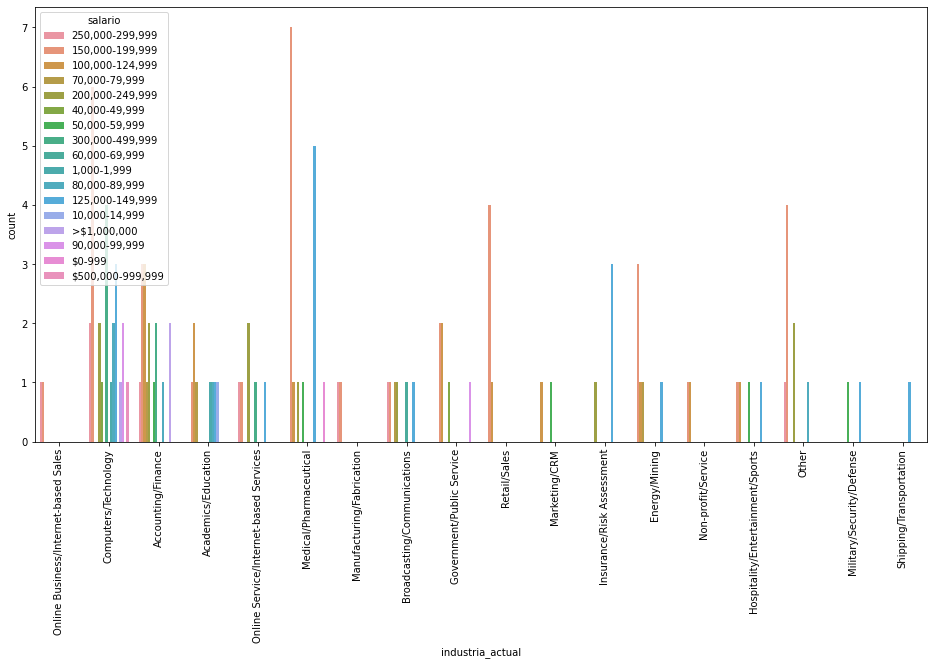

In [ ]:
# salario de los posibles canditatos que provienen de Usa y Spain con 10 - 20 años de experiencia
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')
sns.countplot(x=df_total["industria_actual"], data = df_total , hue ='salario')

<AxesSubplot:xlabel='perfil_profesional', ylabel='count'>

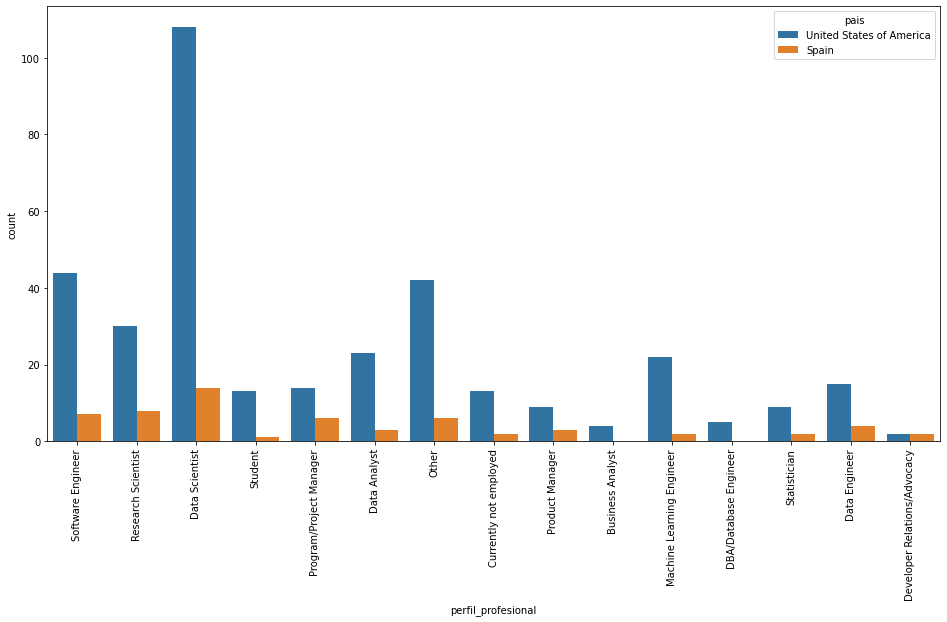

In [ ]:
#aquí podemos coger los más frecuentes
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')
sns.countplot(x=df_10_20_paises["perfil_profesional"], data = df_10_20_paises , hue ='pais')

<AxesSubplot:xlabel='pais', ylabel='count'>

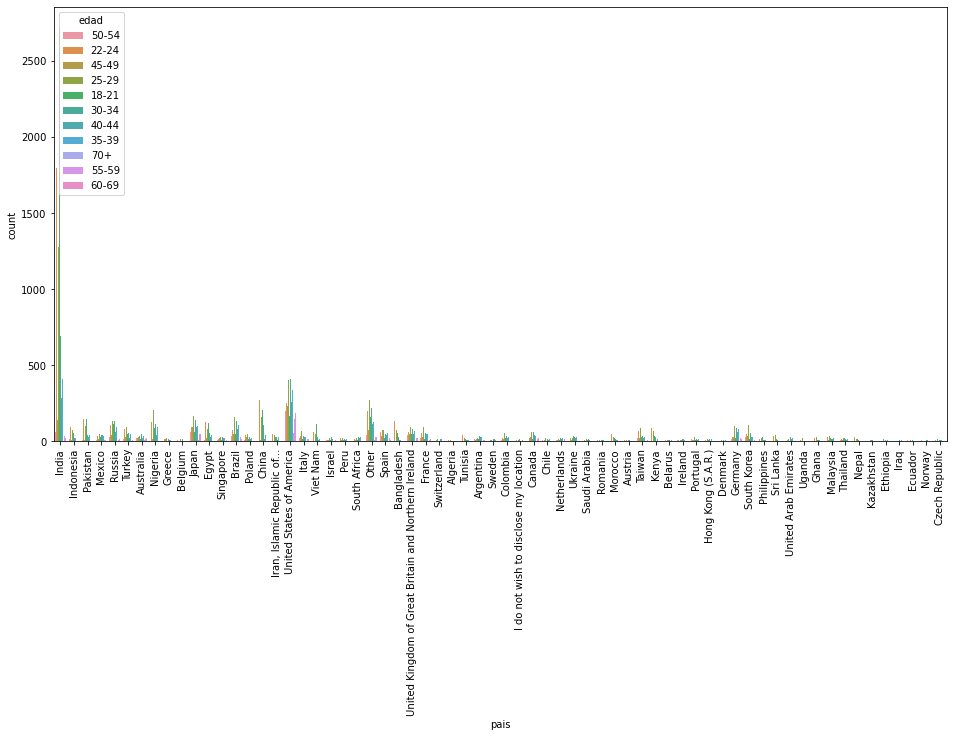

In [ ]:
#aquí podemos coger los más frecuentes
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')
sns.countplot(x=df_new["pais"], data = df_new, hue ='edad')


<AxesSubplot:xlabel='pais', ylabel='count'>

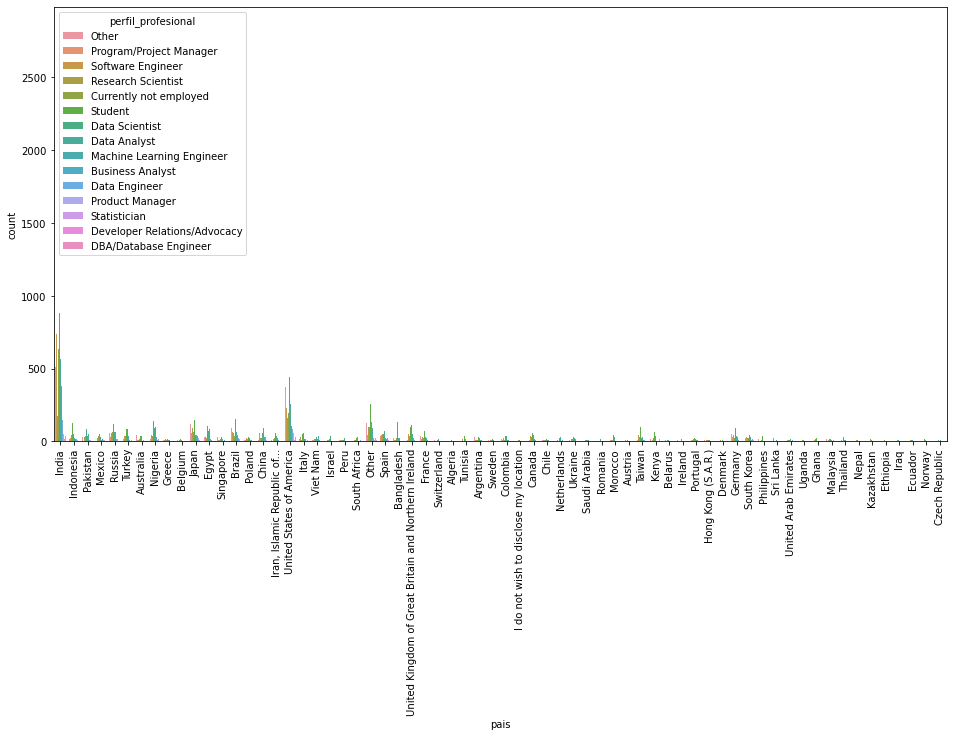

In [ ]:
#aquí podemos coger los más frecuentes
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')
sns.countplot(x=df_new["pais"], data = df_new, hue ='perfil_profesional')


<AxesSubplot:xlabel='perfil_profesional', ylabel='count'>

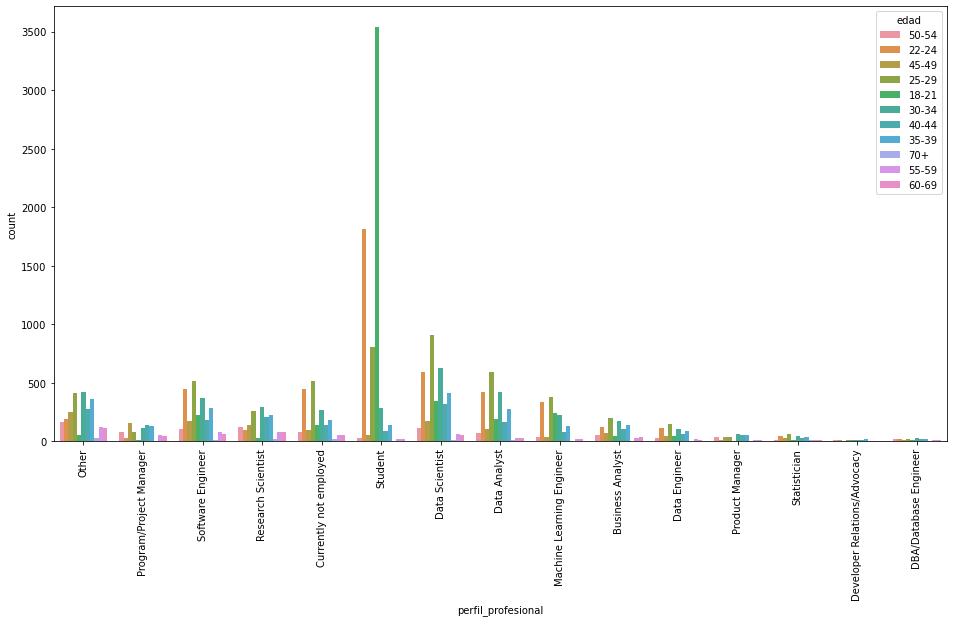

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')
sns.countplot(x=df_new["perfil_profesional"], data = df_new, hue ='edad')


<AxesSubplot:xlabel='pais', ylabel='count'>

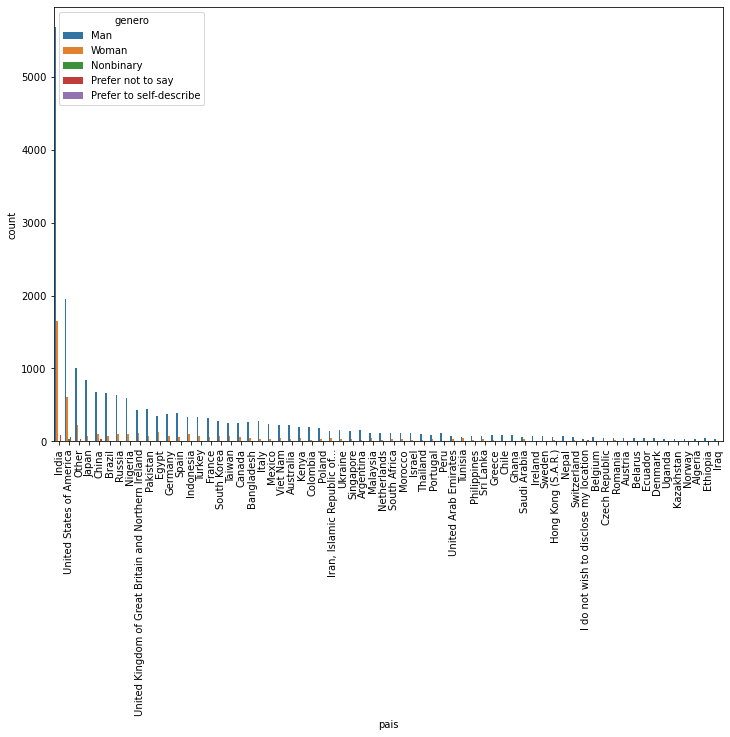

In [ ]:
#aquí podemos coger los 10 primeros (abajo)
plt.figure(figsize=(12,8))
plt.xticks(rotation='vertical')
sns.countplot(x=df_new["pais"], data = df_new, hue ='genero', order =df_new["pais"].value_counts().index)


In [ ]:
frecuentes= df_new["pais"].value_counts()[0:10]
values = frecuentes.keys().to_list()
df_pais_10 = df_new[df_new["pais"].isin(values)]
df_pais_10.head(2)

,edad,genero,pais,educacion,perfil_profesional,experiencia_programando,herramientas_trabajo,año_uso_machine_learning,industria_actual,tamaño_compañía,trabajadores_datascience,salario,herramienta_analisis_datos,lenguajes_habituales,entorno_desarrollo,bibliotecas_visualización,herramientas_machine_learning,programas_big_data,herramientas_bi,notebooks_kaggle,notebooks_colab,publicaciones_github,publicaciones_kaggle,plat_coursera,plat_edx,plat_kaggle,plat_datacamp,plat_fast.ai,plat_udacity,plat_udemy,plat_linkedinlearning,plat_cloudcertification,plat_universitycourses,plat_ninguno,plat_otros,rrss_twitter,rrss_email/newsletters,rrss_reddit,rrss_kaggle,rrss_forums,rrss_yotube,rrss_podcast,rrss_blogs,rrss_journal,rrss_slackcommunity,rrss_none,rrss_others
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,A laptop,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",PostgreSQL,None,NaN,Colab Notebooks,GitHub,Kaggle,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,A laptop,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,"MySQL , MongoDB",None,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='pais', ylabel='count'>

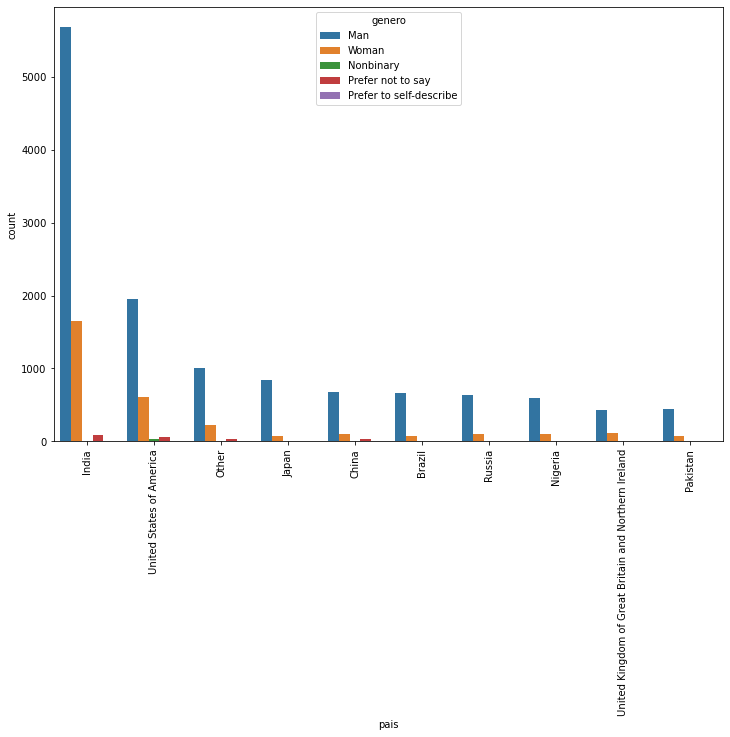

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation='vertical')
sns.countplot(x=df_pais_10["pais"], data = df_pais_10, hue ='genero', order =df_pais_10["pais"].value_counts().index)

# Conclusiones (opcional)